In [4]:
import os

In [25]:
dirpath='C:\\Users\\cptien\\Desktop\\data\\human-horse\\'
train_horse_dir = os.path.join(dirpath, "Train\\horses")
train_human_dir = os.path.join(dirpath, "Train\\humans")
val_horse_dir = os.path.join(dirpath, "Validation\\horses")
val_human_dir = os.path.join(dirpath, "Validation\\humans")

In [26]:
train_horse_dir

'C:\\Users\\cptien\\Desktop\\data\\human-horse\\Train\\horses'

In [28]:
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)
val_horse_names = os.listdir(val_horse_dir)
val_human_names = os.listdir(val_human_dir)


print(train_horse_names[:10])
print(train_human_names[:10])
print(val_horse_names[:10])
print(val_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']


In [29]:
print('Total training horse image: ', len(os.listdir(train_horse_dir)) )
print('Total training human image: ', len(os.listdir(train_human_dir)) )
print('Total validation horse image: ', len(os.listdir(val_horse_dir)) )
print('Total validation human image: ', len(os.listdir(val_human_dir)) )

Total training horse image:  500
Total training human image:  527
Total validation horse image:  128
Total validation human image:  128


In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

nrows = ncols = 4
pic_index = 0 

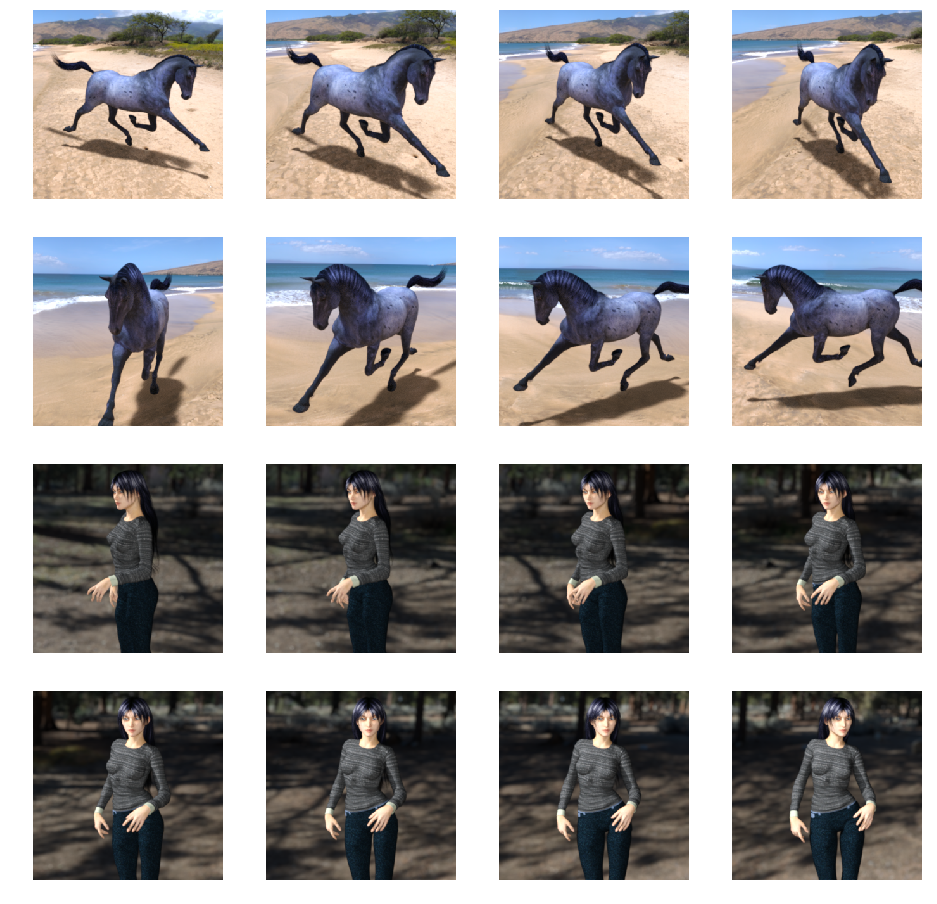

In [42]:
fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows*4)

pic_index += 8
next_horse_pic = [os.path.join(train_horse_dir,fname) for fname in 
                  train_horse_names[pic_index-8:pic_index]]
next_human_pic = [os.path.join(train_human_dir,fname) for fname in 
                  train_human_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_horse_pic+next_human_pic):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

## Build CNN Model

In [45]:
import tensorflow as tf
from tensorflow import keras as k

In [47]:
model = k.models.Sequential([
    k.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    k.layers.MaxPool2D(2,2),
    k.layers.Conv2D(32, (3,3), activation='relu'),
    k.layers.MaxPool2D(2,2),
    k.layers.Conv2D(64, (3,3), activation='relu'),
    k.layers.MaxPool2D(2,2),
    k.layers.Conv2D(64, (3,3), activation='relu'),
    k.layers.MaxPool2D(2,2),
    k.layers.Conv2D(64, (3,3), activation='relu'),
    k.layers.MaxPool2D(2,2),
    # Flatten
    k.layers.Flatten(),
    k.layers.Dense(512, activation='relu'),
    k.layers.Dense(1, activation='sigmoid')
])

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 64)        36928     
__________

In [51]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

## Data Preprocessing


In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale =1./255)

train_generator = train_datagen.flow_from_directory(
                  'C:\\Users\\cptien\\Desktop\\data\\human-horse\\Train\\',
                  target_size =(300,300),
                  batch_size = 128,
                  class_mode ='binary')
val_generator = val_datagen.flow_from_directory(
                  'C:\\Users\\cptien\\Desktop\\data\\human-horse\\Validation\\',
                  target_size =(300,300),
                  batch_size = 32,
                  class_mode ='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Training


In [58]:
history = model.fit_generator(
                train_generator,
                steps_per_epoch=8,
                epochs=15,
                verbose=1,
                validation_data=val_generator,
                validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 94s 12s/step - loss: 0.7551 - acc: 0.4909 - val_loss: 0.8479 - val_acc: 0.5000
Epoch 2/15
8/8 [==============================] - 103s 13s/step - loss: 0.9515 - acc: 0.6445 - val_loss: 0.5717 - val_acc: 0.8477
Epoch 3/15
8/8 [==============================] - 98s 12s/step - loss: 0.4947 - acc: 0.7779 - val_loss: 1.8867 - val_acc: 0.6523
Epoch 4/15
8/8 [==============================] - 93s 12s/step - loss: 0.2551 - acc: 0.9008 - val_loss: 1.1783 - val_acc: 0.7812
Epoch 5/15
8/8 [==============================] - 102s 13s/step - loss: 0.1835 - acc: 0.9346 - val_loss: 1.9407 - val_acc: 0.7695
Epoch 6/15
8/8 [==============================] - 128s 16s/step - loss: 0.1206 - acc: 0.9541 - val_loss: 1.4444 - val_acc: 0.8203
Epoch 7/15
8/8 [==============================] - 108s 13s/step - loss: 0.2989 - acc: 0.8889 - val_loss: 0.7975 - val_acc: 0.7539
Epoch 8/15
8/8 [==============================] - 101s 13s/step - loss: 0.2596 - acc: 0.9385 